In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('hh_demographic_version1.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   household_key        801 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 43.9+ KB


In [5]:
df.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,household_key
0,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,1
1,45-54,Married,50-74K,Homeowner,2 Adults No Kids,2,7
2,25-34,Single,25-34K,Unknown,2 Adults Kids,3,8
3,25-34,Single,75-99K,Homeowner,2 Adults Kids,4,13
4,45-54,Unknown,50-74K,Homeowner,Single Female,1,16


### "MARITAL_STATUS_CODE" 欄位資料轉換

In [4]:
df["MARITAL_STATUS_CODE"].replace(['A', 'B', 'U'],['Married','Unknown','Single'],inplace=True)

### 檢視資料

45-54    288
35-44    194
25-34    142
65+       72
55-64     59
19-24     46
Name: AGE_DESC, dtype: int64

Single     344
Married    340
Unknown    117
Name: MARITAL_STATUS_CODE, dtype: int64

50-74K       192
35-49K       172
75-99K        96
25-34K        77
15-24K        74
Under 15K     61
125-149K      38
100-124K      34
150-174K      30
250K+         11
175-199K      11
200-249K       5
Name: INCOME_DESC, dtype: int64

Homeowner          504
Unknown            233
Renter              42
Probable Owner      11
Probable Renter     11
Name: HOMEOWNER_DESC, dtype: int64

2     318
1     255
3     109
5+     66
4      53
Name: HOUSEHOLD_SIZE_DESC, dtype: int64

None/Unknown    558
1               114
3+               69
2                60
Name: KID_CATEGORY_DESC, dtype: int64



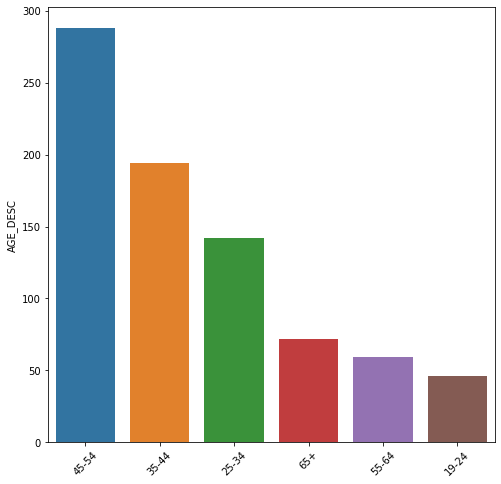

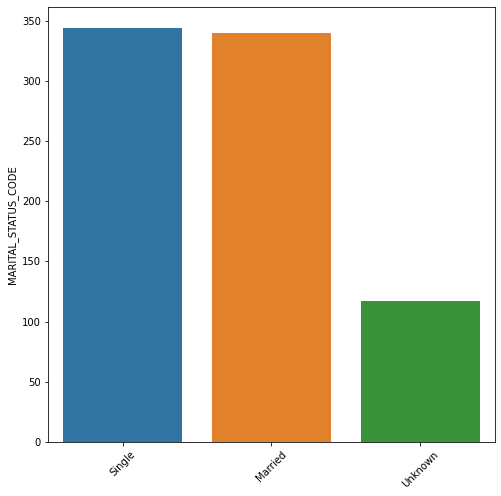

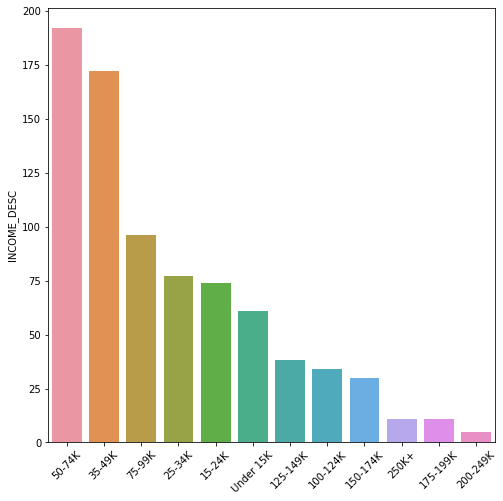

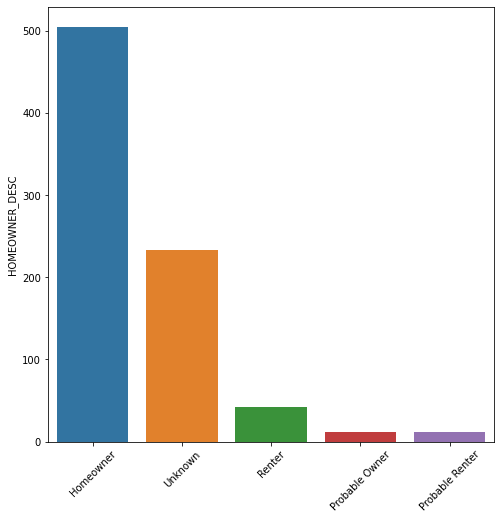

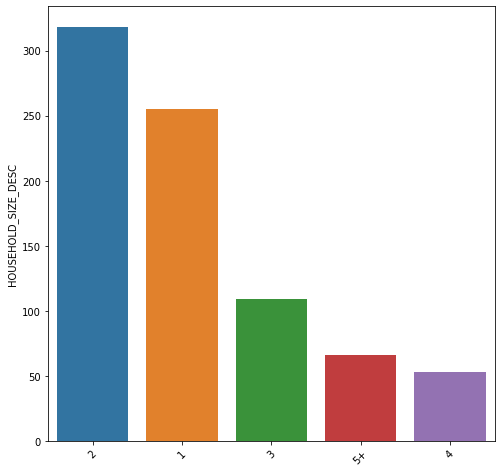

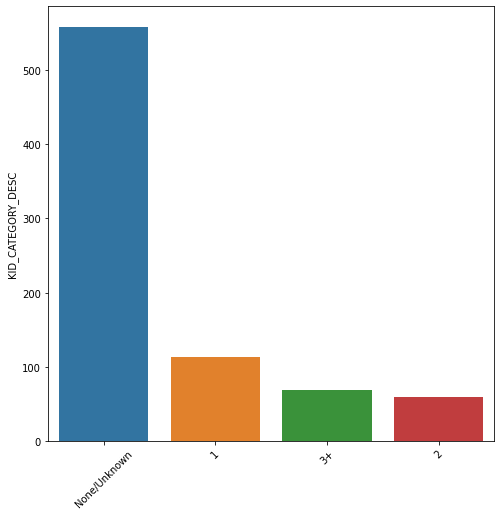

In [5]:
for i in ['AGE_DESC','MARITAL_STATUS_CODE','INCOME_DESC','HOMEOWNER_DESC','HOUSEHOLD_SIZE_DESC','KID_CATEGORY_DESC']:
    a = df[i].value_counts()
    print(a)
    print()
    plt.figure(figsize=(8,8))
    sns.barplot(x = a.index,y = a)
    plt.xticks(rotation= 45)
plt.show()

### 依照圖片顯示
- KID_CATEGORY_DESC 的None/Unknown值太多，所以捨棄該欄位
- HOMEOWNER_DESC 主要為Homeowner，Unknown次之，分布不平均，所以也捨棄 (保留)
- INCOME_DESC 的資料或許可以再縮小區間，減少變數
 - Under 15K
 - 15-24K
 - 25-34K
 - 35-49K
 - 50-74K
 - 75-99K
 - 100k+ (125-149K,100-124K,150-174K,250K+,175-199K,200-249K) 一組 (保留)

In [5]:
df = df.drop(["KID_CATEGORY_DESC"],axis=1)

### 區分的方式

In [6]:
df['INCOME_DESC_new'] = np.select(
    [
        df['INCOME_DESC'] == 'Under 15K', 
        df['INCOME_DESC'] == '15-24K',
        df['INCOME_DESC'] == '25-34K',
        df['INCOME_DESC'] == '35-49K',
        df['INCOME_DESC'] == '50-74K',
        df['INCOME_DESC'] == '75-99K',
        df['INCOME_DESC'] == '100-124K',
        df['INCOME_DESC'] == '125-149K',
        df['INCOME_DESC'] == '150-174K',
        df['INCOME_DESC'] == '175-199K',
        df['INCOME_DESC'] == '200-249K',
        df['INCOME_DESC'] == '250K+',
        
        
    ], 
    [
        'Under 15K', 
        '15-24K',
        '25-34K',
        '35-49K',
        '50-74K',
        '75-99K',
        '100k+',
        '100k+',
        '100k+',
        '100k+',
        '100k+',
        '100k+'
        
        
    ], 
    default='Uknown'
)

In [7]:
df

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,household_key,INCOME_DESC_new
0,65+,Married,35-49K,2 Adults No Kids,2,1,35-49K
1,45-54,Married,50-74K,2 Adults No Kids,2,7,50-74K
2,25-34,Single,25-34K,2 Adults Kids,3,8,25-34K
3,25-34,Single,75-99K,2 Adults Kids,4,13,75-99K
4,45-54,Unknown,50-74K,Single Female,1,16,50-74K
...,...,...,...,...,...,...,...
796,35-44,Single,50-74K,2 Adults No Kids,2,2494,50-74K
797,45-54,Married,75-99K,Unknown,3,2496,75-99K
798,45-54,Single,35-49K,Single Male,1,2497,35-49K
799,25-34,Single,50-74K,2 Adults No Kids,2,2498,50-74K


In [8]:
df = df.drop('INCOME_DESC',axis=1)

In [9]:
df = df.drop('HH_COMP_DESC',axis=1)

In [11]:
df = df[["AGE_DESC", "INCOME_DESC_new", "MARITAL_STATUS_CODE","HOUSEHOLD_SIZE_DESC","household_key"]]

In [12]:
df

,AGE_DESC,INCOME_DESC_new,MARITAL_STATUS_CODE,HOUSEHOLD_SIZE_DESC,household_key
0,65+,35-49K,Married,2,1
1,45-54,50-74K,Married,2,7
2,25-34,25-34K,Single,3,8
3,25-34,75-99K,Single,4,13
4,45-54,50-74K,Unknown,1,16
...,...,...,...,...,...
796,35-44,50-74K,Single,2,2494
797,45-54,75-99K,Married,3,2496
798,45-54,35-49K,Single,1,2497
799,25-34,50-74K,Single,2,2498


In [20]:
df.columns = ['age','income','marital_status','household_size','household_key']

In [21]:
df

,age,income,marital_status,household_size,household_key
0,65+,35-49K,Married,2,1
1,45-54,50-74K,Married,2,7
2,25-34,25-34K,Single,3,8
3,25-34,75-99K,Single,4,13
4,45-54,50-74K,Unknown,1,16
...,...,...,...,...,...
796,35-44,50-74K,Single,2,2494
797,45-54,75-99K,Married,3,2496
798,45-54,35-49K,Single,1,2497
799,25-34,50-74K,Single,2,2498


45-54    288
35-44    194
25-34    142
65+       72
55-64     59
19-24     46
Name: age, dtype: int64

50-74K       192
35-49K       172
100k+        129
75-99K        96
25-34K        77
15-24K        74
Under 15K     61
Name: income, dtype: int64

Single     344
Married    340
Unknown    117
Name: marital_status, dtype: int64

2     318
1     255
3     109
5+     66
4      53
Name: household_size, dtype: int64



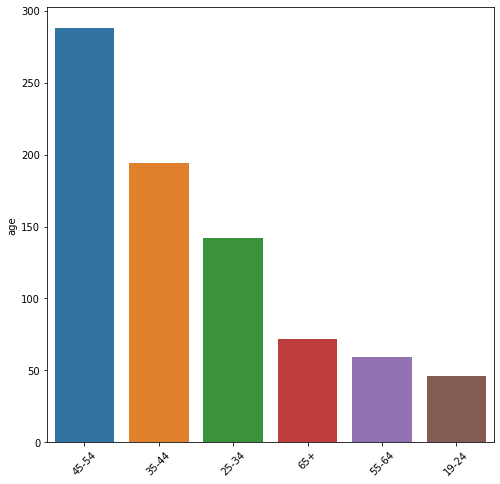

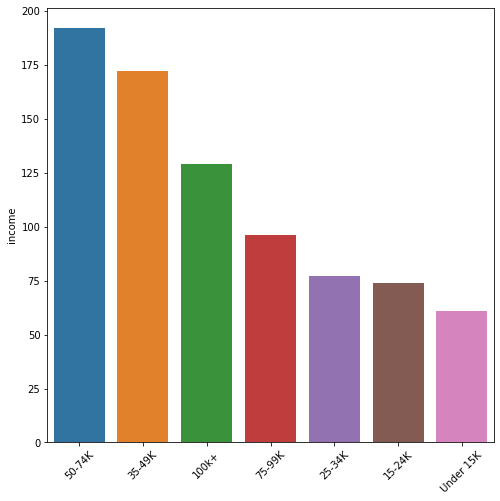

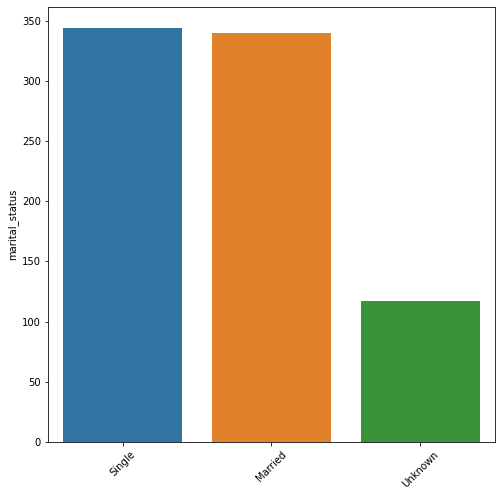

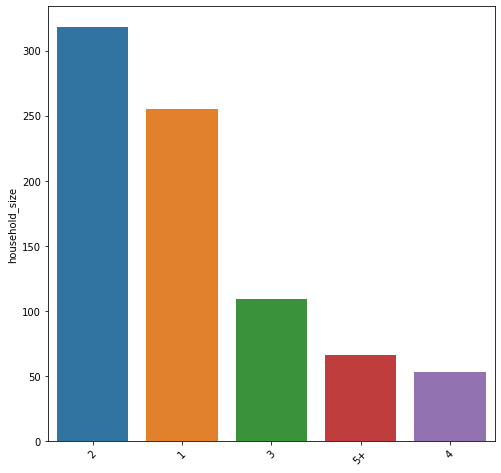

In [24]:
for i in ['age','income','marital_status','household_size']:
    a = df[i].value_counts()
    print(a)
    print()
    plt.figure(figsize=(8,8))
    sns.barplot(x = a.index,y = a)
    plt.xticks(rotation= 45)
plt.show()

In [6]:
df.to_csv('hh_demographic_version1.csv', index=False)

In [3]:
df = pd.read_csv('hh_demographic_version1.csv')

In [4]:
df

,age,income,marital_status,household_size,household_key
0,65+,35-49K,Married,2,1
1,45-54,50-74K,Married,2,7
2,25-34,25-34K,Single,3,8
3,25-34,75-99K,Single,4,13
4,45-54,50-74K,Unknown,1,16
...,...,...,...,...,...
796,35-44,50-74K,Single,2,2494
797,45-54,75-99K,Married,3,2496
798,45-54,35-49K,Single,1,2497
799,25-34,50-74K,Single,2,2498


In [12]:
df.query('household_key == 2375')

,age,income,marital_status,household_size,household_key


In [ ]:
42289906117